In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
df = pd.read_csv('Milk_deadline.csv')
df.head()

,Unnamed: 0,created_at,Methane,Ethanol,Humidity,Temperature,Date,Time,Hour,Mins,...,M1,E2,M2,E3,M3,M4,E4,M5,E5,Quality
0,1,2022-06-30T20:26:06+00:00,199,145,71,31.8,30-06-2022,20:26:06,20,26,...,199.0,145.000000,199.000000,0.000,0.000,0.011595,0.008543,0.715458,0.836695,8.8
1,2,2022-06-30T20:27:07+00:00,198,142,71,31.8,30-06-2022,20:27:07,20,27,...,198.0,142.000000,198.000000,0.000,0.000,0.011537,0.008366,0.717932,0.844015,8.8
2,3,2022-06-30T20:27:22+00:00,199,143,70,31.8,30-06-2022,20:27:22,20,27,...,198.8,143.392761,198.767089,0.328,13.008,0.011583,0.008449,0.715993,0.840608,8.8
3,4,2022-06-30T20:28:07+00:00,203,143,70,31.9,30-06-2022,20:28:07,20,28,...,195.6,144.158186,195.355043,4.936,18.008,0.011397,0.008496,0.724165,0.838697,8.8
4,5,2022-06-30T20:28:22+00:00,195,144,70,31.9,30-06-2022,20:28:22,20,28,...,191.8,144.158186,191.347187,5.008,20.896,0.011175,0.008496,0.733816,0.838697,8.8


In [15]:
def rate(initial, final):
    diff = ((df.Day[final] - df.Day[initial])*24 + (df.Hour[final] - df.Hour[initial]))*60 + (df.Mins[final] - df.Mins[initial])
    rate = (df.Quality[initial] - df.Quality[final]) / diff    
    return(rate)

    
print(rate(1, 243))
print(rate(100, 243))
print(rate(300, 4500))

0.004739068958333333
0.00810364128571428
0.0003557245270233194


In [16]:
df.drop(columns={'Unnamed: 0', 'E1', 'E2', 'E3', 'E4', 'E5', 'M1', 'M2','M3', 'M4', 'M5'}, inplace=True, axis=1)
df

,created_at,Methane,Ethanol,Humidity,Temperature,Date,Time,Hour,Mins,Secs,Year,Month,Day,Quality
0,2022-06-30T20:26:06+00:00,199,145,71,31.8,30-06-2022,20:26:06,20,26,6,2022,6,30,8.800000
1,2022-06-30T20:27:07+00:00,198,142,71,31.8,30-06-2022,20:27:07,20,27,7,2022,6,30,8.800000
2,2022-06-30T20:27:22+00:00,199,143,70,31.8,30-06-2022,20:27:22,20,27,22,2022,6,30,8.800000
3,2022-06-30T20:28:07+00:00,203,143,70,31.9,30-06-2022,20:28:07,20,28,7,2022,6,30,8.800000
4,2022-06-30T20:28:22+00:00,195,144,70,31.9,30-06-2022,20:28:22,20,28,22,2022,6,30,8.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,2022-07-03T21:54:44+00:00,235,177,81,30.1,03-07-2022,21:54:44,21,54,44,2022,7,3,7.015693
4583,2022-07-03T21:55:02+00:00,220,180,81,30.0,03-07-2022,21:55:02,21,55,2,2022,7,3,7.018208
4584,2022-07-03T21:55:19+00:00,220,177,81,30.0,03-07-2022,21:55:19,21,55,19,2022,7,3,7.047359
4585,2022-07-03T21:55:36+00:00,222,178,81,30.0,03-07-2022,21:55:36,21,55,36,2022,7,3,7.059208


<AxesSubplot:>

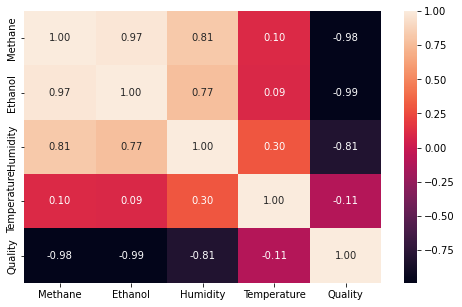

In [17]:
df.drop(columns={'Date', 'Time', 'Hour', 'Mins', 'Secs', 'Year', 'Month', 'Day'}, inplace=True, axis=1)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)


In [18]:
X = df.loc[:, 'Methane':'Temperature']
y = df.loc[:, 'Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [19]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [20]:
y_prediction =  LR.predict(X_test)
y_prediction

array([6.87784005, 8.04698406, 4.56864863, ..., 5.7892635 , 5.14600429,
       6.29336592])

In [21]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9891099799760816
mean_sqrd_error is== 0.02813217321558091
root_mean_squared error of is== 0.16772648334589535


In [22]:
filename = 'trained_model_milk.sav'
pickle.dump(LR, open(filename, 'wb'))

In [25]:
df.to_csv('MILK_MODEL.csv')